<a href="https://colab.research.google.com/github/srijasriramdas/CODTECHTASK1/blob/main/142_DAV_ASSIGNMENT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

A. Data Loading & Inspection
This step involves importing the dataset using pandas, then performing an initial exploration. We:

Load the dataset with pd.read_csv().

Use head() and tail() to preview rows.

Check data types with dtypes to understand column formats (e.g., numbers, strings, dates).

Check for missing values using isna().sum() to identify potential data quality issues.

Goal: Understand the structure, size, and quality of the raw data.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# --------------------------------------------
# A. DATA LOADING & INSPECTION
# --------------------------------------------

# Upload csv file of dataset
from google.colab import files
df = pd.read_csv("House Price India.csv")


# Display first 5 rows
print("\nFirst 5 rows of the dataset:")
print(df.head())

# Display last 3 rows
print("\nLast 3 rows of the dataset:")
print(df.tail(3))

# Check data types
print("\nData types of each column:")
print(df.dtypes)

# Check missing values
print("\nMissing values in each column:")
print(df.isna().sum())






First 5 rows of the dataset:
           id   Date  number of bedrooms  number of bathrooms  living area  \
0  6762810145  42491                   5                 2.50         3650   
1  6762810635  42491                   4                 2.50         2920   
2  6762810998  42491                   5                 2.75         2910   
3  6762812605  42491                   4                 2.50         3310   
4  6762812919  42491                   3                 2.00         2710   

   lot area  number of floors  waterfront present  number of views  \
0      9050               2.0                   0                4   
1      4000               1.5                   0                0   
2      9480               1.5                   0                0   
3     42998               2.0                   0                0   
4      4500               1.5                   0                0   

   condition of the house  ...  Built Year  Renovation Year  Postal Code  \
0   

B. Data Cleaning
This step ensures the dataset is clean and ready for analysis:

Removes rows with missing values using dropna() (or we can choose to fill them with fillna()).

Converts the date column (Posted On) to proper datetime format using pd.to_datetime().

Goal: Ensure consistency in data types and remove/handle incomplete data.



In [ ]:
# --------------------------------------------
# B. DATA CLEANING
# --------------------------------------------

# Drop rows with any missing values
df = df.dropna()

# Convert 'Date' column to datetime if it exists
if 'Date' in df.columns:
    df['Date'] = pd.to_datetime(df['Date'])

print("\nData cleaned. Remaining missing values:")
print(df.isna().sum())




Data cleaned. Remaining missing values:
id                                       0
Date                                     0
number of bedrooms                       0
number of bathrooms                      0
living area                              0
lot area                                 0
number of floors                         0
waterfront present                       0
number of views                          0
condition of the house                   0
grade of the house                       0
Area of the house(excluding basement)    0
Area of the basement                     0
Built Year                               0
Renovation Year                          0
Postal Code                              0
Lattitude                                0
Longitude                                0
living_area_renov                        0
lot_area_renov                           0
Number of schools nearby                 0
Distance from the airport                0
Price        

C. Basic Analysis (NumPy & Pandas)
We perform basic statistical analysis to summarize the dataset:

Calculate mean, median, and standard deviation using NumPy or Pandas.

Use describe() to get summary stats like min, max, 25th, and 75th percentiles.

Apply filters (df[df['Bedrooms'] > 3]) and sorting (sort_values()) to extract useful subsets.

Goal: Derive key insights such as average prices and find high-value properties.

In [ ]:

# --------------------------------------------
# C. BASIC ANALYSIS (NumPy & Pandas)
# --------------------------------------------

# Compute stats on Price
print("\nPrice statistics:")
print("Mean:", df['Price'].mean())
print("Median:", df['Price'].median())
print("Standard Deviation:", df['Price'].std())

# Summary statistics
print("\nSummary statistics:")
print(df.describe())

# Filter: Properties with more than 3 bedrooms
print("\nProperties with more than 3 bedrooms:")
print(df[df['number of bedrooms'] > 3])

# Sort by Price (descending)
df_sorted = df.sort_values(by='Price', ascending=False)
print("\nTop 5 most expensive properties:")
print(df_sorted.head())




Price statistics:
Mean: 538932.2183310534
Median: 450000.0
Standard Deviation: 367532.3808039669

Summary statistics:
                 id                           Date  number of bedrooms  \
count  1.462000e+04                          14620        14620.000000   
mean   6.762821e+09  1970-01-01 00:00:00.000042604            3.379343   
min    6.762810e+09  1970-01-01 00:00:00.000042491            1.000000   
25%    6.762815e+09  1970-01-01 00:00:00.000042546            3.000000   
50%    6.762821e+09  1970-01-01 00:00:00.000042600            3.000000   
75%    6.762826e+09  1970-01-01 00:00:00.000042662            4.000000   
max    6.762832e+09  1970-01-01 00:00:00.000042734           33.000000   
std    6.237575e+03                            NaN            0.938719   

       number of bathrooms   living area      lot area  number of floors  \
count         14620.000000  14620.000000  1.462000e+04      14620.000000   
mean              2.129583   2098.262996  1.509328e+04        

D. Advanced Operations
This part includes more complex transformations and grouping:

Create a new column (Price_per_sqft) to evaluate property value per unit area.

Use groupby() to calculate average prices by city.

Perform dataset merging using pd.merge() (e.g., combining with population data) to enrich the dataset.

Goal: Add meaningful features and compare across groups (like cities).

In [ ]:

# --------------------------------------------
# D. ADVANCED OPERATIONS
# --------------------------------------------

# Add a new column: Price per square foot
df['Price_per_sqft'] = df['Price'] / df['living area']

# Group by Postal Code and compute average price
postal_avg = df.groupby('Postal Code')['Price'].mean()
print("\nAverage house price by postal code:")
print(postal_avg)

# Simulated merge: Assume we have postal population data
postal_demo = pd.DataFrame({
    'Postal Code': df['Postal Code'].unique(),
    'Nearby Malls': np.random.randint(1, 5, size=len(df['Postal Code'].unique()))
})
merged_df = pd.merge(df, postal_demo, on='Postal Code')
print("\nMerged dataset sample:")
print(merged_df.head())




Average house price by postal code:
Postal Code
122003    8.503290e+05
122004    8.398533e+05
122005    6.389622e+05
122006    6.136386e+05
122007    5.728347e+05
              ...     
122068    3.153815e+05
122069    4.812247e+05
122070    2.799618e+05
122071    2.348311e+06
122072    2.342158e+05
Name: Price, Length: 70, dtype: float64

Merged dataset sample:
           id                          Date  number of bedrooms  \
0  6762810145 1970-01-01 00:00:00.000042491                   5   
1  6762810635 1970-01-01 00:00:00.000042491                   4   
2  6762810998 1970-01-01 00:00:00.000042491                   5   
3  6762812605 1970-01-01 00:00:00.000042491                   4   
4  6762812919 1970-01-01 00:00:00.000042491                   3   

   number of bathrooms  living area  lot area  number of floors  \
0                 2.50         3650      9050               2.0   
1                 2.50         2920      4000               1.5   
2                 2.75        

E. Pivot Tables
Pivot tables help summarize data across two dimensions:

First pivot: Total price aggregated by city using aggfunc='sum'.

Second pivot: Mean price by city and furnishing status.

Compared with groupby() to highlight similarities or differences.

Goal: Summarize and visualize data patterns across multiple categories.

In [ ]:

# --------------------------------------------
# E. PIVOT TABLES
# --------------------------------------------

# Pivot Table 1: Total price by Postal Code
pivot_1 = pd.pivot_table(df, index='Postal Code', values='Price', aggfunc='sum')
print("\nTotal price by Postal Code (Pivot Table):")
print(pivot_1)

# Pivot Table 2: Average price by number of bedrooms and condition of the house
pivot_2 = pd.pivot_table(df, index='number of bedrooms', columns='condition of the house', values='Price', aggfunc='mean')
print("\nAverage price by bedrooms & house condition:")
print(pivot_2)

# Compare with groupby
print("\nCompare with groupby (Price by Postal Code):")
print(df.groupby('Postal Code')['Price'].mean())




Total price by Postal Code (Pivot Table):
                 Price
Postal Code           
122003       110542765
122004       131856965
122005       265808285
122006       243614533
122007       226842530
...                ...
122068        48568749
122069        42828996
122070        23236830
122071        86887500
122072        30916483

[70 rows x 1 columns]

Average price by bedrooms & house condition:
condition of the house         1              2             3              4  \
number of bedrooms                                                             
1                       350000.0  200000.000000  3.060758e+05  337558.064516   
2                       182250.0  238161.071429  3.975414e+05  402595.558000   
3                       225990.0  280503.571429  4.641607e+05  448316.289983   
4                       445750.0  534949.000000  6.316785e+05  619781.994068   
5                            NaN  235500.000000  8.020951e+05  704919.996466   
6                       43250

 F. Data Visualization
Visualization helps make insights more intuitive:

Histogram shows price distribution.

Barplot shows average price per city.

Scatter plot helps find trends between Area and Price.

Boxplot reveals price distribution across number of bedrooms.

Goal: Reveal patterns and outliers using visual tools (Matplotlib & Seaborn).

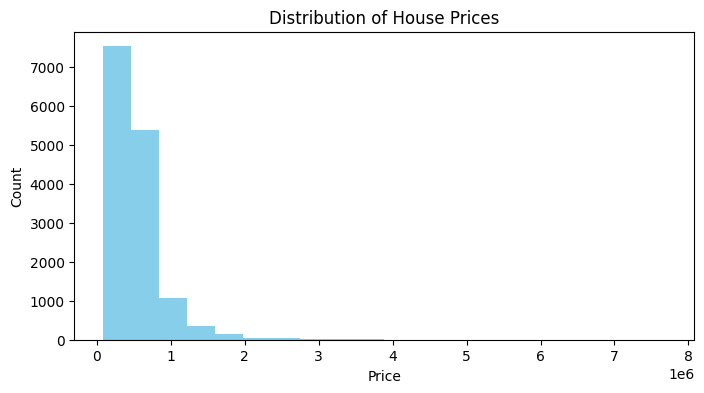

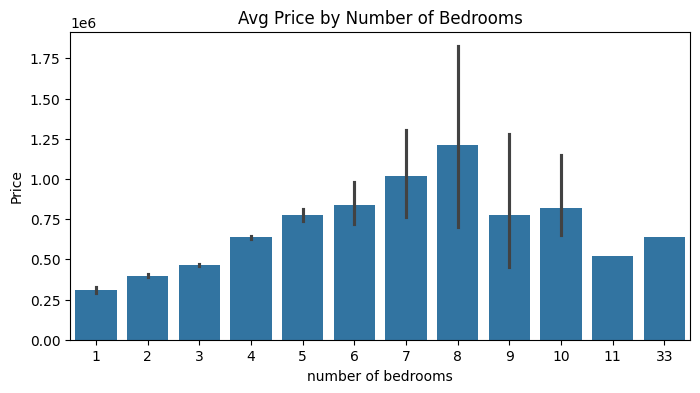

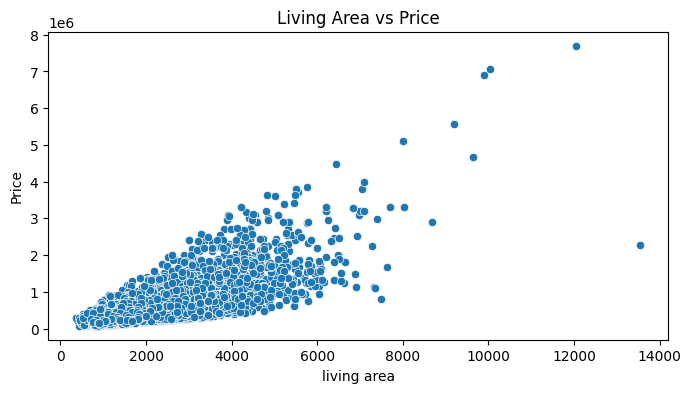

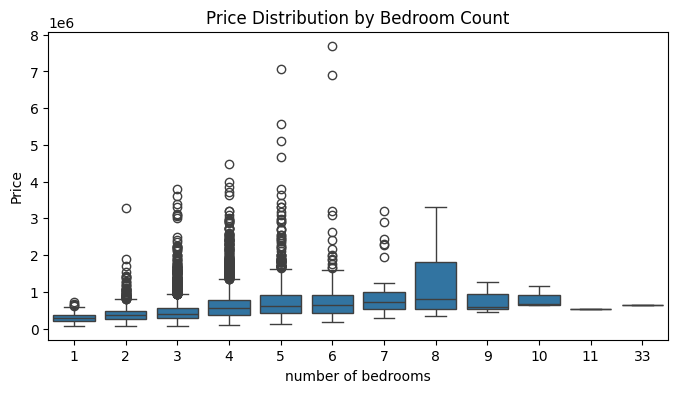

In [ ]:

# --------------------------------------------
# F. DATA VISUALIZATION
# --------------------------------------------

# A. Histogram of Price
plt.figure(figsize=(8, 4))
plt.hist(df['Price'], bins=20, color='skyblue')
plt.title('Distribution of House Prices')
plt.xlabel('Price')
plt.ylabel('Count')
plt.show()

# B. Seaborn: Avg Price by number of bedrooms
plt.figure(figsize=(8, 4))
sns.barplot(x='number of bedrooms', y='Price', data=df, estimator=np.mean)
plt.title('Avg Price by Number of Bedrooms')
plt.show()

# C. Seaborn: Living Area vs Price
plt.figure(figsize=(8, 4))
sns.scatterplot(x='living area', y='Price', data=df)
plt.title('Living Area vs Price')
plt.show()

# D. Advanced: Boxplot of Price by Bedroom Count
plt.figure(figsize=(8, 4))
sns.boxplot(x='number of bedrooms', y='Price', data=df)
plt.title('Price Distribution by Bedroom Count')
plt.show()



G. Advanced NumPy Operations
We use NumPy for numerical analysis:

Z-score normalization of the 'Price' column helps standardize values.

Boolean indexing filters specific conditions like medium-sized houses using NumPy logic.

Goal: Apply numerical techniques to analyze and segment data efficiently.



In [ ]:

# --------------------------------------------
# G. ADVANCED NUMPY OPERATIONS
# --------------------------------------------

# Normalize Price column using z-score
price_mean = np.mean(df['Price'])
price_std = np.std(df['Price'])
df['Price_zscore'] = (df['Price'] - price_mean) / price_std

# Boolean indexing: Homes between 1000–2000 sqft
area = df['living area'].values
medium_homes = df[np.logical_and(area >= 1000, area <= 2000)]
print("\nNumber of medium-sized homes (1000–2000 sqft):", len(medium_homes))





Number of medium-sized homes (1000–2000 sqft): 6867


In [ ]:
print("completed assignment!")

completed assignment!
